# In this notebook, I have presented the implementation.

## The notebook titled Traffic_Sign_Classifiers has the answers/discussions to the questions 1,2,3,4 and 5.

## The notebook titled MY_TEST_SET_FINAL has the remaining questions answered with code to support the answers. 



In [1]:
import os
import numpy as np
import random 

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file  = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
y_train.shape

(39209,)

In [5]:
# Using TensorFlow API to convert RGB images to Grayscale images

import tensorflow as tf

X_tr = tf.placeholder(tf.uint8, shape = X_train.shape)
X_te = tf.placeholder(tf.uint8, shape = X_test.shape)

X_train_gray = tf.image.rgb_to_grayscale(X_tr)
X_test_gray  = tf.image.rgb_to_grayscale(X_te)

with tf.Session() as sess:
    X_train = sess.run(X_train_gray, feed_dict={X_tr:X_train})
    X_test  = sess.run(X_test_gray, feed_dict={X_te:X_test})

In [6]:
#Scaling the pixel values to lie between 0.1 and 0.9 
#Scaling all the input data sets X_train, X_validation and X_test

def normalize_grayscale(image_data):
    
    a = 0.1
    b = 0.9
    
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train = normalize_grayscale(X_train)
#X_validation = normalize_grayscale(X_validation)
X_test = normalize_grayscale(X_test)

[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


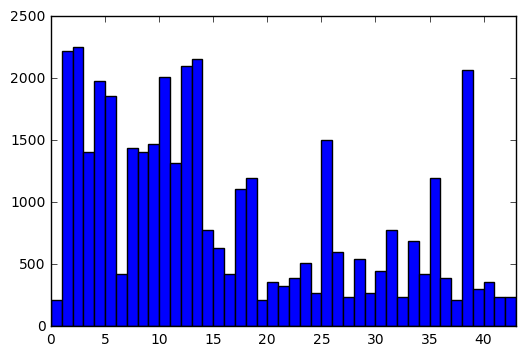

In [7]:
# Visualizing the Histogram plot

hist, bin_edges = np.histogram(y_train, bins = range(44))
print(hist)
# array([0, 2, 4, 1]) 
print (bin_edges)
# array([0, 1, 2, 3, 4])) 
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   

In [8]:
# generating fake data by rotating the images randomly. 

from skimage import transform

default = 500
start   = 0

for i in range(43):
    
    #X_temp = []
    
    X_temp = X_train[start:start+hist[i]]
    #y_temp = i*np.ones(X_temp.shape[0])
    
    if (hist[i] < default):
        
        #print('In')
        
        diff   = default - hist[i]  #Need to generate diff number for fake data 
        
        
        #print(X_temp.shape)
        
        for j in range(diff):
            
            tilt  = random.uniform(0.0, 10.0)
            index = random.randint(0, len(X_temp) - 1)
            test_image = transform.rotate(X_temp[index],tilt,resize=False,center=None, order=1, mode='constant', cval=0, clip=True, preserve_range=False)        
            X_temp = np.vstack([X_temp, test_image[np.newaxis, :]])
            
        if i == 0:
            
            #print('First')    
            X_train_aug = X_temp
            y_train_aug = i*(np.ones(X_temp.shape[0]))
                
        else:
                
            #print(X_train_aug.shape)
                
            #print(X_temp.shape)
                
            #a = np.vstack([X_train_aug, X_temp])
                
            #print(a)
                
            X_train_aug = np.vstack([X_train_aug, X_temp])
            y_temp = i*(np.ones(X_temp.shape[0]))
            y_train_aug = np.hstack([y_train_aug, y_temp])
            #print('Now Here')
                       
    else:
        
        if i == 0:
            
            X_train_aug = X_temp
            
        else:
            
            X_train_aug = np.vstack([X_train_aug, X_temp])
            y_temp = i*(np.ones(X_temp.shape[0]))
            y_train_aug = np.hstack([y_train_aug, y_temp])
            #print('Here')
            
    start = start + hist[i]

In [9]:
X_train_aug.shape

(42739, 32, 32, 1)

In [10]:
y_train_aug.shape

(42739,)

[ 500 2220 2250 1410 1980 1860  500 1440 1410 1470 2010 1320 2100 2160  780
  630  500 1110 1200  500  500  500  500  510  500 1500  600  500  540  500
  500  780  500  689  500 1200  500  500 2070  500  500  500  500]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


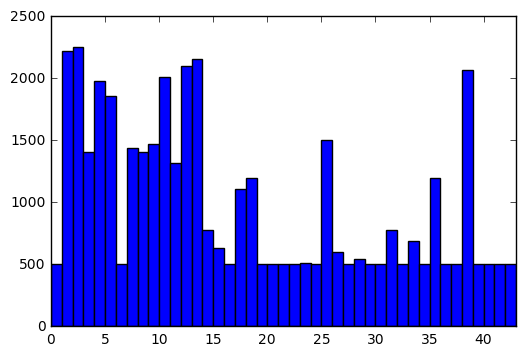

In [11]:
# Histogram plot after adding fake data

hist, bin_edges = np.histogram(y_train_aug, bins = range(44))
print(hist)
# array([0, 2, 4, 1]) 
print (bin_edges)
# array([0, 1, 2, 3, 4])) 
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   

In [12]:
# generating validation set from the training set

from sklearn.model_selection import train_test_split

X_train_aug, X_validation, y_train_aug, y_validation = train_test_split(X_train_aug, y_train_aug, test_size=0.2, random_state=0)

12


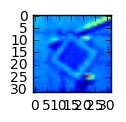

In [13]:
# test Visualization of the training set images.

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


index = random.randint(0, len(X_train_aug))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))


plt.imshow(image)
print(y_train[index])

In [14]:
# Shuffle the data set

from sklearn.utils import shuffle

X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

In [15]:

#Setting Hyperparameters
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128



In [16]:
# The architecture for the neural net

from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
     
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x64.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #weight_norm = tf.nn.l2_loss(conv1_W)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 30x30x64. Output = 15x15x64.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    #Implementing DropOut 
    
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    
    #####################################################    

    # SOLUTION: Flatten. Input = 15x15x64. Output = 14400.
    fc0   = flatten(conv1)
    
    # SOLUTION: Layer 2: Fully Connected 1. Input = 14400. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(14400, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #weight_norm = tf.add(weight_norm, tf.nn.l2_loss(fc1_W))
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Implementing DropOut
    
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected 2. Input = 512. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #weight_norm = tf.add(weight_norm, tf.nn.l2_loss(fc2_W))
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)   
    
    
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 4: Fully Connected 3. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    #logits = tf.nn.dropout(fc3, keep_prob)
    
    #weight_norm = tf.add(weight_norm, tf.nn.l2_loss(fc3_W))
    
    return logits #,weight_norm

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [18]:
rate = 0.001
#beta = 0.01

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
#+ beta*w_norm
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:

saver = tf.train.Saver()
save_file = 'C:\\Users\\Vikas\\CarND-Traffic-Sign-Classifier-Project\\Final_model.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_aug)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print('trained model saved')

Training...

EPOCH 1 ...
Validation Accuracy = 0.511

EPOCH 2 ...
Validation Accuracy = 0.879

EPOCH 3 ...
Validation Accuracy = 0.926

EPOCH 4 ...
Validation Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.957

EPOCH 6 ...
Validation Accuracy = 0.967

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.975

EPOCH 9 ...
Validation Accuracy = 0.978

EPOCH 10 ...
Validation Accuracy = 0.979

trained model saved


## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [21]:
# Testing on Test Data

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


In [22]:
# Load Images 
import os
from scipy import misc
import numpy as np

In [23]:
test_image_1 = misc.imread('images1.png')
test_image_2 = misc.imread('images2.png')
test_image_3 = misc.imread('images3.png')
test_image_4 = misc.imread('images4.png')
test_image_5 = misc.imread('images5.png')
test_image_6 = misc.imread('images6.png')

In [24]:
test_image_1 = misc.imresize(test_image_1,(32,32)) # 1
test_image_2 = misc.imresize(test_image_2,(32,32)) # 28
test_image_3 = misc.imresize(test_image_3,(32,32)) # 26
test_image_4 = misc.imresize(test_image_4,(32,32)) # 33
test_image_5 = misc.imresize(test_image_5,(32,32)) # 14
test_image_6 = misc.imresize(test_image_6,(32,32)) # 17

In [25]:
final_list = test_image_1[np.newaxis, :]
final_list = np.vstack([final_list, test_image_2[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_3[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_4[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_5[np.newaxis, :]])
final_list = np.vstack([final_list, test_image_6[np.newaxis, :]])

y_true = np.array([1,28,26,33,14,17])


In [26]:
import tensorflow as tf

mock_test = tf.placeholder(tf.uint8, shape = final_list.shape)
mock_test_gray = tf.image.rgb_to_grayscale(mock_test)
with tf.Session() as sess:
    final_list = sess.run(mock_test_gray, feed_dict={mock_test:final_list})

In [27]:
final_list = normalize_grayscale(final_list)

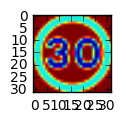

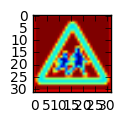

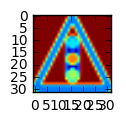

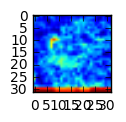

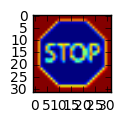

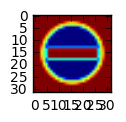

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(1,1))
plt.imshow(final_list[0].squeeze())  #1 


plt.figure(figsize=(1,1))
plt.imshow(final_list[1].squeeze())  #28

plt.figure(figsize=(1,1))
plt.imshow(final_list[2].squeeze())  #26

plt.figure(figsize=(1,1))
plt.imshow(final_list[3].squeeze())  #33

plt.figure(figsize=(1,1))
plt.imshow(final_list[4].squeeze())  #14

plt.figure(figsize=(1,1))
plt.imshow(final_list[5].squeeze())  #17




In [29]:
def evaluate_mine(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples):
        batch_x, batch_y = X_data[offset], y_data[offset]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [30]:
# Outside Input - From Online resource

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(final_list, y_true)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.833


## This above test was to calculate the accuracy directly using the same function used for the validation set. The accuracy turned out to be 50%. In the Next notebook - MY_TEST_SET_FINAL, a more formal discussion on the image set used and the using the tf.nn.top_k() we observe the softmax probabilities.